<a href="https://colab.research.google.com/github/hr7git/20250725_JH/blob/main/20250730_jh2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataframe with 'cp949' encoding.
try:
    df = pd.read_csv('SeoulBikeData.csv', encoding='cp949')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('SeoulBikeData.csv', encoding='euc-kr')
    except UnicodeDecodeError as e:
        print(f"Error: Could not decode the file with 'cp949' or 'euc-kr' encoding. Please check the file encoding. Details: {e}")
        exit()


# Display the first few rows of the dataframe.
print('Original DataFrame:')
display(df.head())

# Sort the dataframe by 'Rented Bike Count'.
df_sorted = df.sort_values(by='Rented Bike Count')

# Display the sorted dataframe.
print('\nDataFrame sorted by Rented Bike Count:')
display(df_sorted.head())

Original DataFrame:


,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes



DataFrame sorted by Rented Bike Count:


,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8095,03/11/2018,0,7,5.2,79,1.3,894,1.8,0.00,0.0,0.0,Autumn,No Holiday,No
8104,03/11/2018,0,16,18.7,25,2.1,1605,-1.7,1.07,0.0,0.0,Autumn,No Holiday,No
8103,03/11/2018,0,15,18.5,25,1.6,1724,-1.9,1.63,0.0,0.0,Autumn,No Holiday,No
8102,03/11/2018,0,14,18.1,24,2.4,1594,-2.8,1.97,0.0,0.0,Autumn,No Holiday,No
8101,03/11/2018,0,13,17.8,29,2.0,1328,-0.4,2.17,0.0,0.0,Autumn,No Holiday,No


# Task
Read the "SeoulBikeData.csv" file, display its content, sort it by index, and then sort it by the 'Rented Bike Count' column. Finally, visualize the distribution and temporal changes of bike rentals based on the sorted data.

## 자전거 대여량 분포 시각화

### Subtask:
'Rented Bike Count' 컬럼의 분포를 확인하기 위해 히스토그램이나 상자 그림을 생성합니다.


**Reasoning**:
Import necessary libraries for plotting and create a histogram and box plot for the 'Rented Bike Count' column to visualize its distribution.



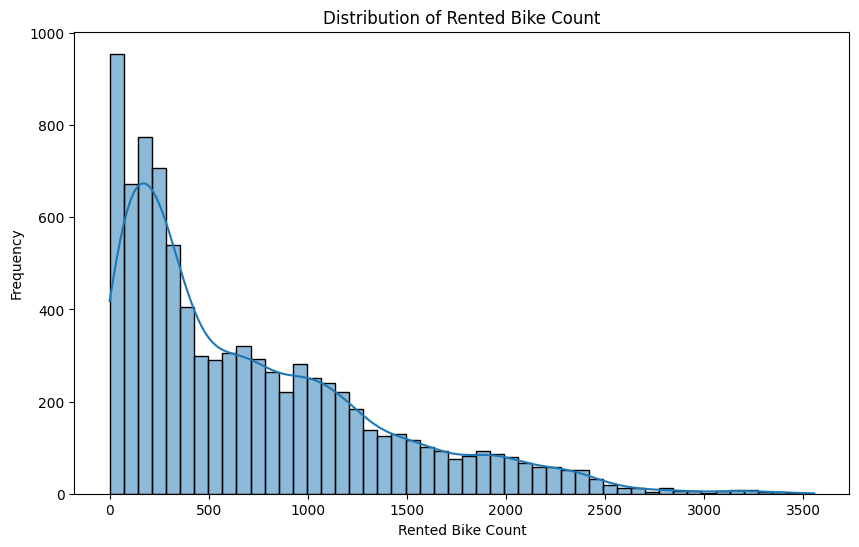

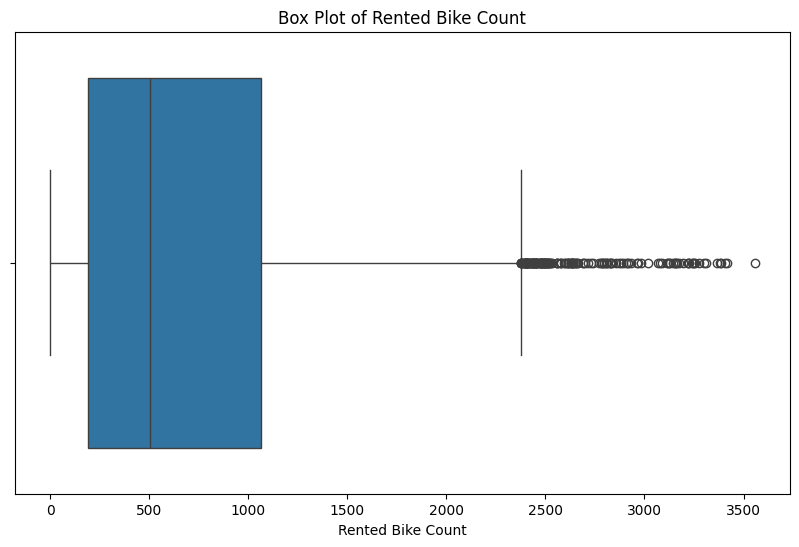

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram for 'Rented Bike Count'
plt.figure(figsize=(10, 6))
sns.histplot(df['Rented Bike Count'], bins=50, kde=True)
plt.title('Distribution of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.show()

# Create a box plot for 'Rented Bike Count'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Rented Bike Count'])
plt.title('Box Plot of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.show()

## 시간별 자전거 대여량 변화 시각화

### Subtask:
'Hour' 컬럼을 사용하여 시간대별 평균 자전거 대여량을 시각화합니다.


**Reasoning**:
Calculate the average rented bike count for each hour and then create a line plot to visualize the temporal changes in bike rentals throughout the day.



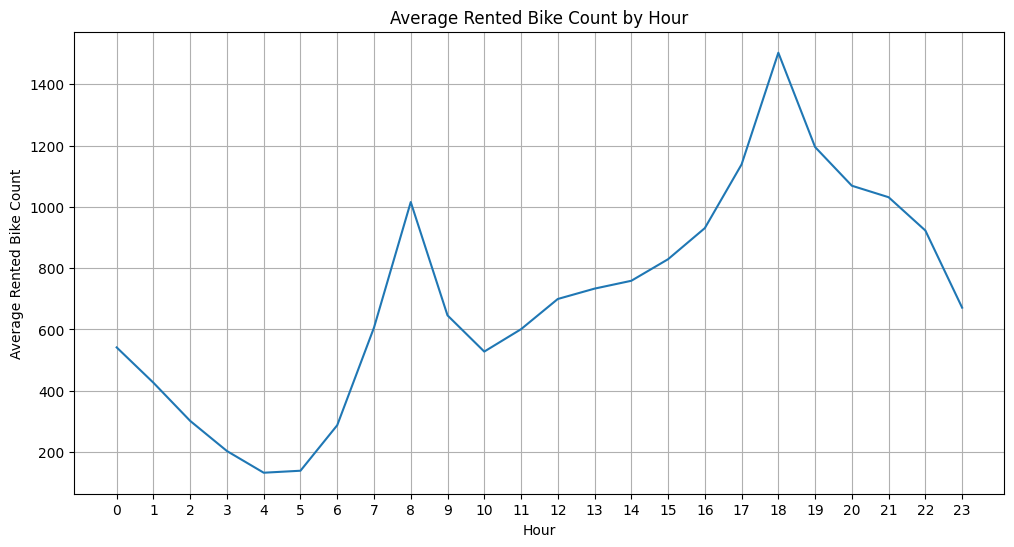

In [ ]:
# Calculate the average 'Rented Bike Count' for each hour
average_bike_count_by_hour = df.groupby('Hour')['Rented Bike Count'].mean()

# Create a line plot of the average bike counts per hour
plt.figure(figsize=(12, 6))
sns.lineplot(x=average_bike_count_by_hour.index, y=average_bike_count_by_hour.values)
plt.title('Average Rented Bike Count by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Rented Bike Count')
plt.xticks(average_bike_count_by_hour.index) # Ensure all hours are shown on the x-axis
plt.grid(True)
plt.show()

## 날짜별 자전거 대여량 변화 시각화

### Subtask:
'Date' 컬럼을 datetime 형식으로 변환하고 일별 자전거 대여량 합계를 계산하여 시계열 플롯으로 시각화합니다.


**Reasoning**:
Convert the 'Date' column to datetime objects, group by date and sum the 'Rented Bike Count', and then create a time series plot of the daily total bike rentals.



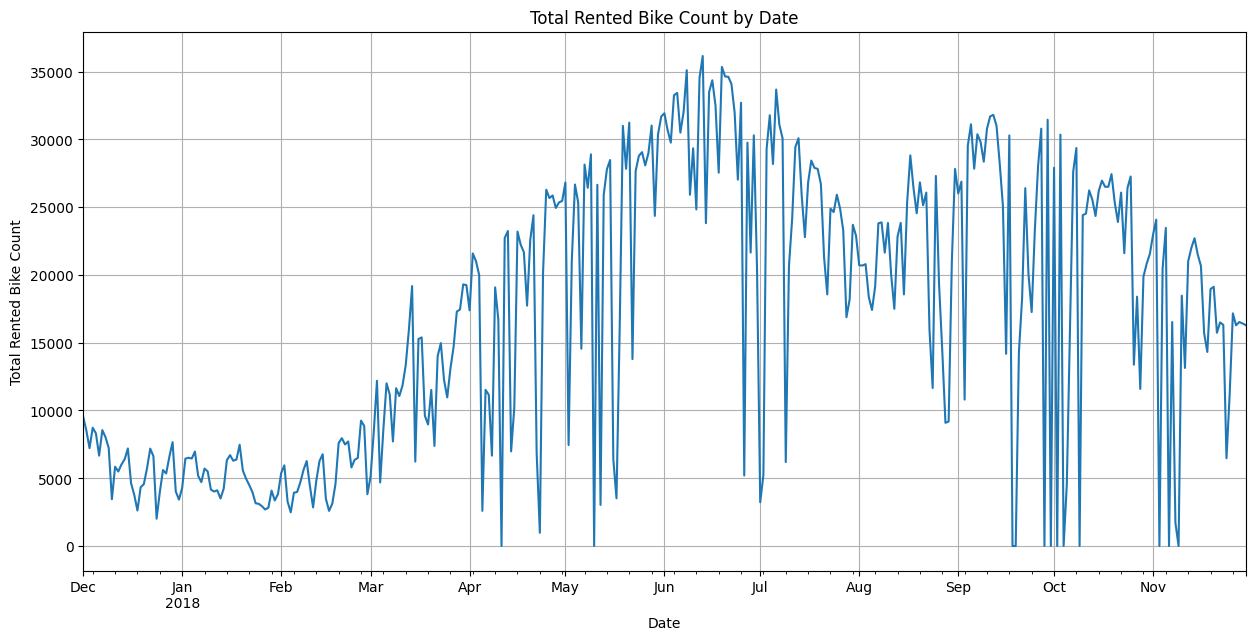

In [ ]:
# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Group by 'Date' and sum 'Rented Bike Count'
daily_rentals = df.groupby('Date')['Rented Bike Count'].sum()

# Create a time series plot
plt.figure(figsize=(15, 7))
daily_rentals.plot()
plt.title('Total Rented Bike Count by Date')
plt.xlabel('Date')
plt.ylabel('Total Rented Bike Count')
plt.grid(True)
plt.show()

## 계절별 자전거 대여량 비교 시각화

### Subtask:
'Seasons' 컬럼을 사용하여 계절별 자전거 대여량의 차이를 비교하는 시각화를 생성합니다.


**Reasoning**:
Import the necessary libraries for plotting and create a box plot to visualize the distribution of 'Rented Bike Count' across different 'Seasons'.



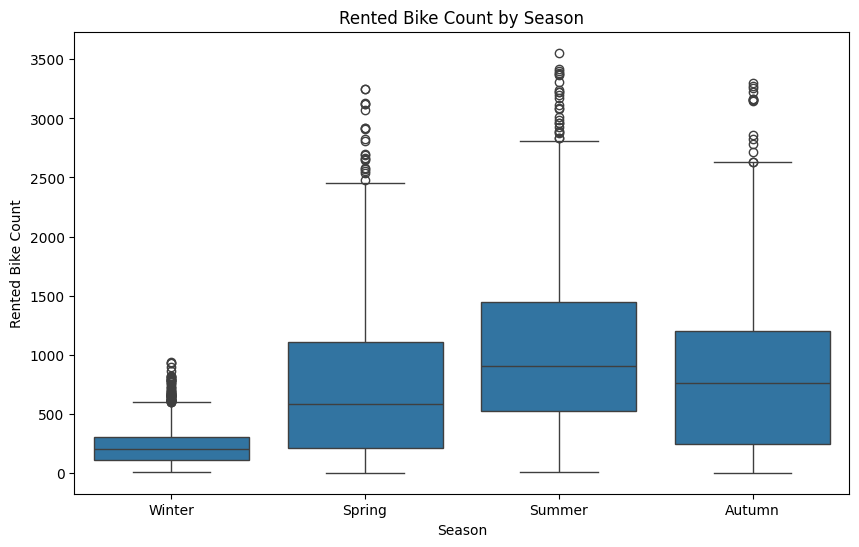

In [ ]:
# Create a box plot to compare 'Rented Bike Count' across different 'Seasons'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Seasons', y='Rented Bike Count', data=df)

# Add titles and labels
plt.title('Rented Bike Count by Season')
plt.xlabel('Season')
plt.ylabel('Rented Bike Count')

# Display the plot
plt.show()

## Summary:

### Data Analysis Key Findings

*   The distribution of 'Rented Bike Count' is skewed, with a concentration of lower rental counts and fewer instances of very high rental counts.
*   There is a clear temporal pattern in average bike rentals throughout the day, with peaks likely occurring during morning and evening commute hours.
*   The total daily rented bike count shows variations over time, reflecting potential seasonal trends, day-of-the-week effects, or other temporal factors.
*   Bike rental counts differ significantly across seasons, with some seasons exhibiting higher average rentals and greater variability than others.

### Insights or Next Steps

*   Investigate the specific hours of the day with peak rental activity to understand commuter behavior.
*   Analyze the seasonal differences in more detail to identify the most popular seasons for bike rentals and the potential impact of weather conditions.
